In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


Text(0, 0.5, 'Count')

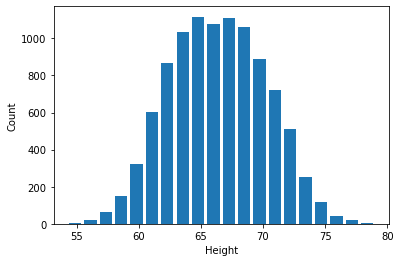

In [13]:
plt.hist(df.height,bins = 20,rwidth = 0.8)
plt.xlabel('Height')
plt.ylabel('Count')

In [14]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

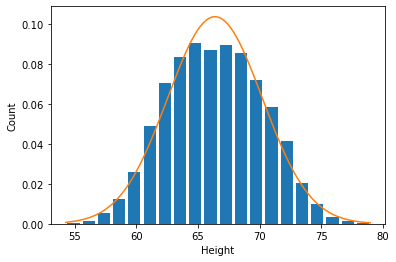

In [17]:
from scipy.stats import norm
plt.hist(df.height,bins = 20,rwidth = 0.8,density = True)
plt.xlabel('Height')
plt.ylabel('Count')

rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [18]:
upper_limit = df.height.mean()+3*df.height.std()
upper_limit

77.91014411725232

In [19]:
lower_limit = df.height.mean()-3*df.height.std()
lower_limit

54.824975392478876

In [21]:
df[(df.height>upper_limit)|(df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [23]:
df1 = df[((df.height<upper_limit)&(df.height>lower_limit))]
df1.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [24]:
df['zscore'] = (df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [26]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [27]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [30]:
df2 = df[(df['zscore']<3)&(df['zscore']>-3)]
df2.shape

(9993, 3)